핸즈온 4장 모델 훈련 p. 184 - 203

# Chapter 4. 모델 훈련

##4.5 규제가 있는 선형 모델
###4.5.1 릿지 회귀
**비용함수**



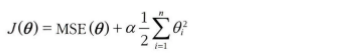

**일반 릿지 모델을 사용한 선형적 예측(왼쪽)와 릿지 규제를 사용한 다항 회귀(오른쪽)의 비교**

- 규제항을 증가시킬수록 모델의 분산은 줄고 편향은 커짐 -> 알파를 증가시킬수록 직선에 가까워짐.

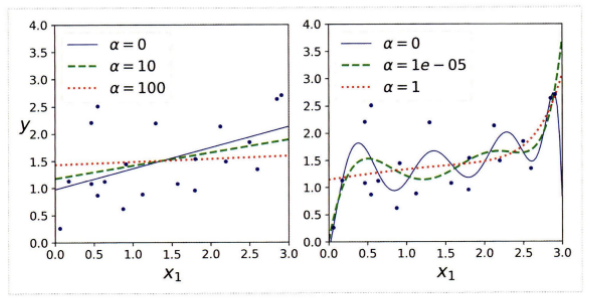

**정규방정식**

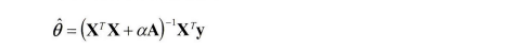

###4.5.2 라쏘 회귀
**비용함수**

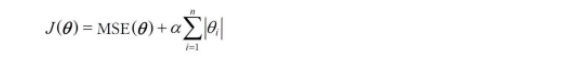

**일반 릿지 모델을 사용한 선형적 예측(왼쪽)와 릿지 규제를 사용한 다항 회귀(오른쪽)의 비교**
- 라쏘 회귀는 자동으로 특성 선택을 하여 희소 모델을 만듦. -> 알파가 1e-07값일때의 다항 회귀 그래프는 거의 선형으로 보임.

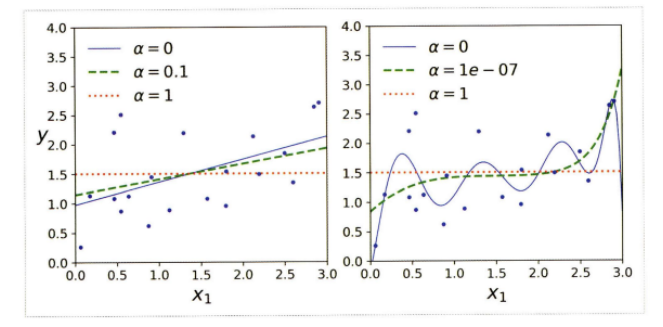

**라쏘와 릿지 규제의 비교**

라쏘에 비해 릿지 회귀는
- 첫째 파라미터가 전역 최적점에 가까워질수록 그래디언트가 작아짐.
- 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워짐.


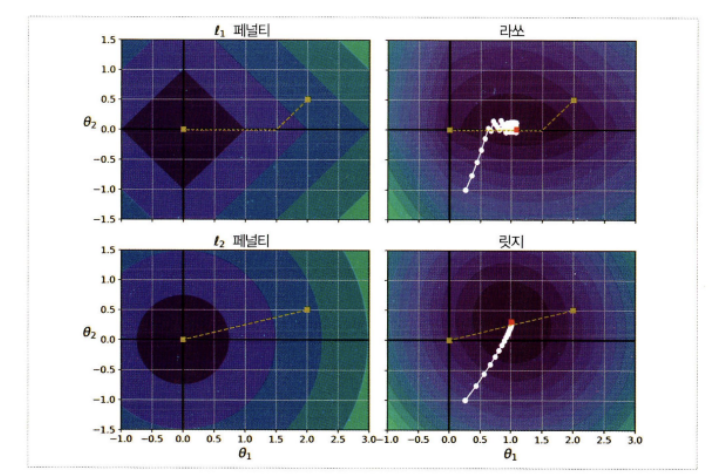

###4.5.3 엘라스틱넷

**비용함수**


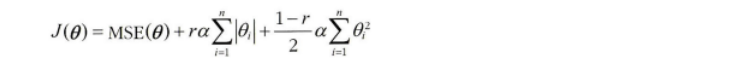

**릿지, 라쏘, 엘라스틱넷 어떻게 사용?**
- 특성 개수가 적으면 라쏘, 엘라스틱넷
- 단, 특성 개수가 훈련 샘플 수보다 많거나, 특성 몇 개가 강하게 연관되어 있으면 엘라스틱넷

###4.5.4 조기 종료
**조기 종료 규제 시 배치 경사법으로 훈련시킨 고차원 다항 회귀 모델의 예측 에러 변화**
- 모델이 훈련 데이터에 과대적합되기 시작하면서 검증 에러가 다시 상승함.

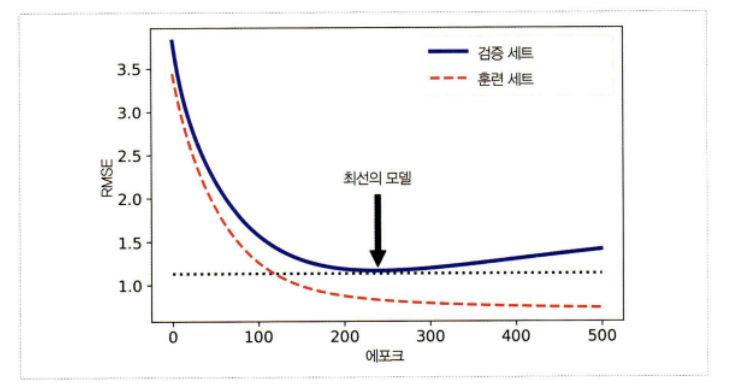

##4.6 로지스틱 회귀
분류에서도 사용될 수 있는 회귀 알고리즘.

추정 확률 50%를 기준으로 양성 클래스와 음성 클래스로 나뉨.

###4.6.1 확률 추정
**시그모이드 함수 (로지스틱 함수)**



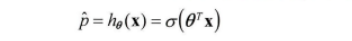

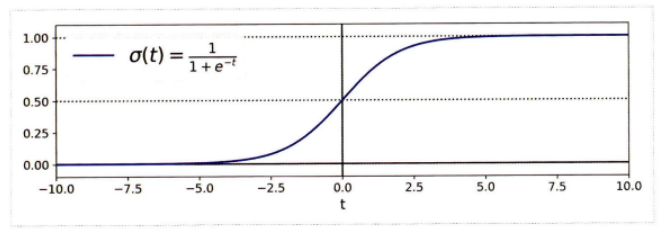


###4.6.2 훈련과 비용 함수
**로지스틱 회귀의 비용함수(로그 손실)**
- 모든 훈련 샘플의 비용을 평균한 것
- 배치 경사 하강법, 미니배치 경사 하강법 알고리즘 사용


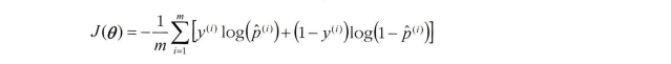

###4.6.3 결정 경계

###4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)
- 여러개의 이진 분류기를 훈련시켜 연결하지 않고 다중 클래스를 지원하도록 일반화


**샘플 x가 클래스 k에 속할 확률**

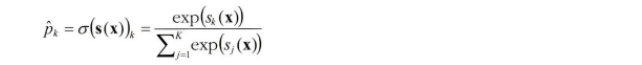

-------------------------------------------------------

[코드]
###4.5 규제가 있는 선형 모델
**4.5.1 릿지 회귀**

In [ ]:
import numpy as np

m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
# 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([11.63287721])

In [ ]:
# 확률적 경사 하강법을 사용한 릿지 회귀
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([9.89470742])

**4.5.2 라쏘 회귀**

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.20802475])

**4.5.3 엘라스틱넷**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.22119815])

**4.5.4 조기 종료**



In [ ]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### 4.6 로지스틱 회귀

**4.6.1 확률 추정**

**4.6.2 훈련과 비용 함수**

**4.6.3 결정 경계**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

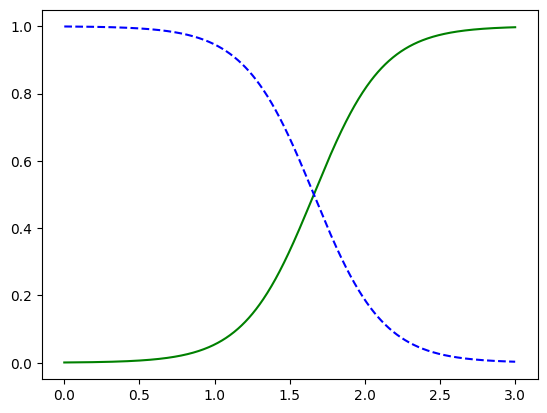

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**4.6.4 소프트맥스 회귀**

In [ ]:
X = iris["data"][:, (2, 3)]   # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])